# Bar Chart Demonstration

[Clustered Bar Charts]()

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [3]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Arial']

### Example 1:

Display the count of Pokémon introduced in each generation using **bar chart** with the 'generation_id' column.

In [5]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [6]:
pokemon.generation_id.unique()

array([1, 2, 3, 4, 5, 6, 7])

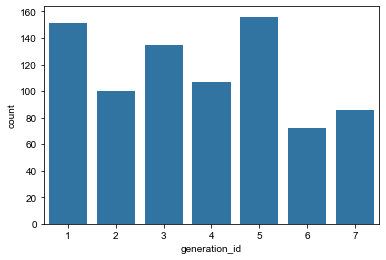

In [9]:
base_color = sns.color_palette()[0]

sns.countplot(data=pokemon, x='generation_id', color=base_color);

### Example 2:

Using **bar chart**, display the total count of Pokémon based on _type_.

_Notice:_ Each Pokémon species has either type_1, type_2 or both types that play a part in its offensive and defensive capabilities.

**STEPS:**

1. Select the `id`, and `species` columns from pokemon. 
2. Remove the `type_1`, `type_2` columns from pokemon
3. Add a new column `type_level` that can have a value either `type_1` or `type_2`
4. Add another column `type` that will contain the actual value contained in the `type_1`, `type_2` columns. 

In [29]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [31]:
# reconstruct and integrate the type_1 and type_2 columns
pkmn_types = pd.melt(pokemon, \
                     id_vars=['species'], \
                     value_vars=['type_1', 'type_2'], \
                     var_name='type_level', \
                     value_name='type', )

# drop the nulls. `drop=True` means not insert the original index into feature cols.
pkmn_types = pkmn_types.dropna().reset_index(drop=True)
pkmn_types.head()

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire


In [32]:
pkmn_types

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire
...,...,...,...
1207,magearna,type_2,fairy
1208,marshadow,type_2,ghost
1209,naganadel,type_2,dragon
1210,stakataka,type_2,steel


In [33]:
# the rows will be expanded as 2 time as the original
print("Before melt: {0}. After melt: {1}".format(pokemon.shape, pkmn_types.shape))

Before melt: (807, 14). After melt: (1212, 3)


In [36]:
# Display the frequency of each type.
print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts(), sep='')

The frequency of each type is:
type_1    807
type_2    405
Name: type_level, dtype: int64


In [38]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [39]:
type_order = type_counts.index.values
type_order

array(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'], dtype=object)

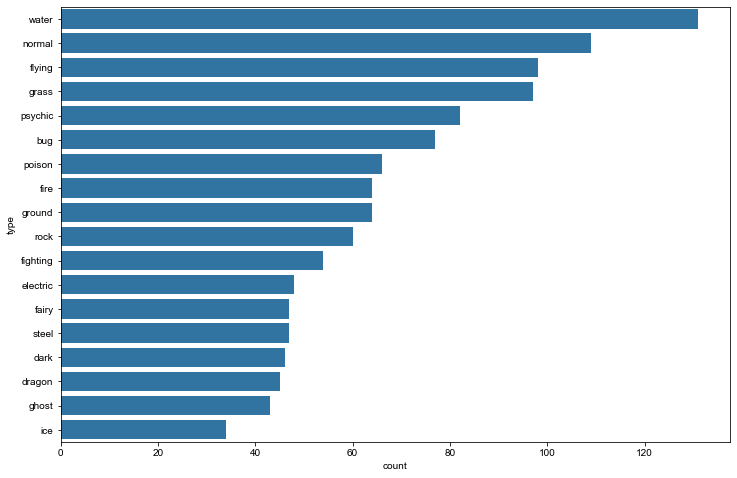

In [43]:
plt.figure(figsize=(12,8))

base_color = sns.color_palette()[0]

sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

___Variations___:

Create a relative frequency plot of the proportion of Pokémon with each type, sorted from most frequent to least.

**Notice:** The sum across bars should be greater than 100%, since many Pokémon have two types. (Which means the denominator should be the sum of `id`s, but not `type`)

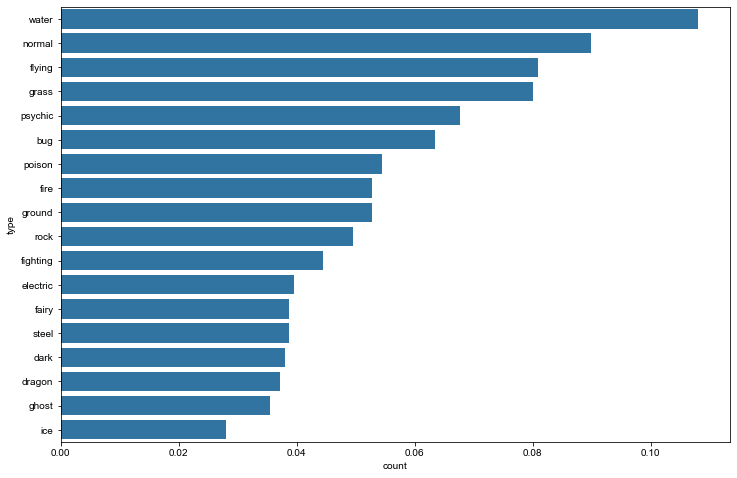

In [47]:
# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sns.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(12,8))
base_color = sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names);

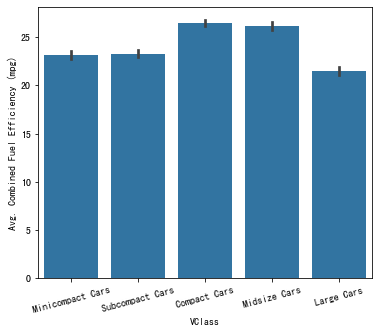

In [59]:
plt.figure(figsize=(6,5))

base_color = sns.color_palette()[0]

# y轴表示各VClass类中’comb‘的平均数
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar plot above - The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

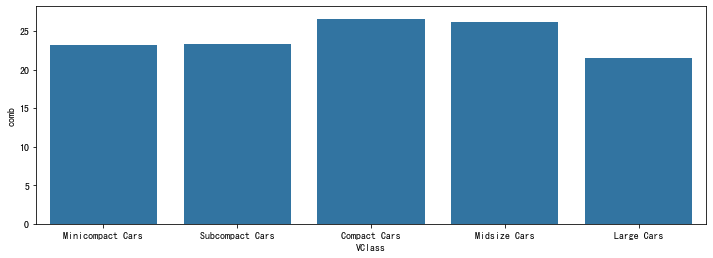

In [61]:
# 不带误差棒的柱状图
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0);


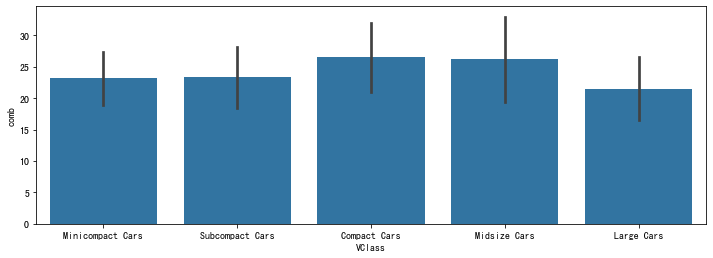

In [62]:
# 误差棒表示标准偏差’sd‘
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd');

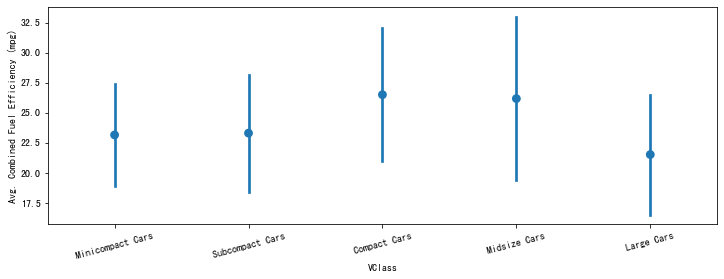

In [63]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

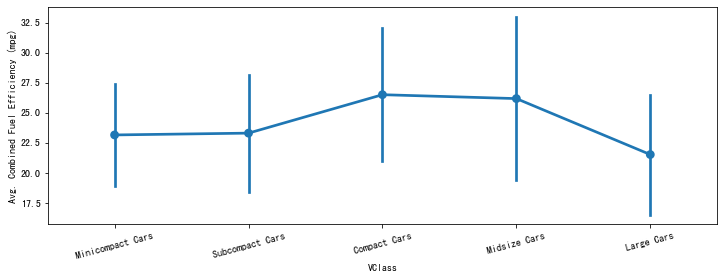

In [66]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

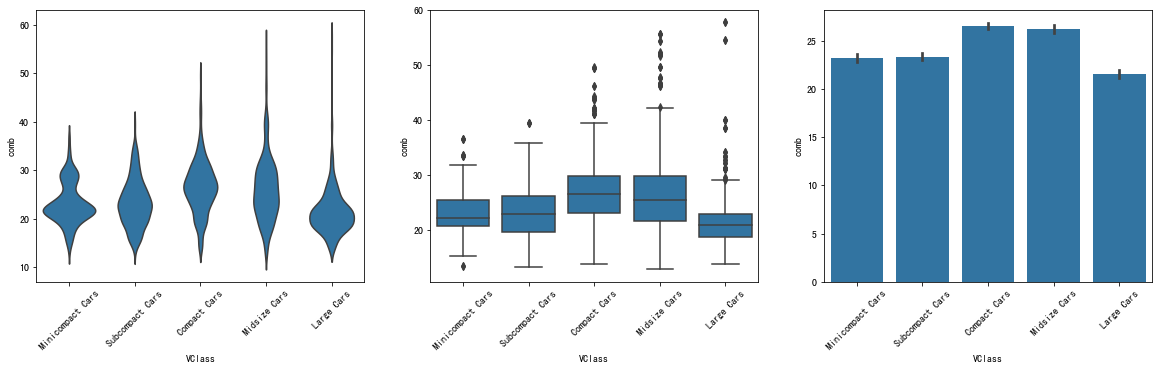

In [68]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size


# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

### 平均综合效率与汽车品牌之间的差异

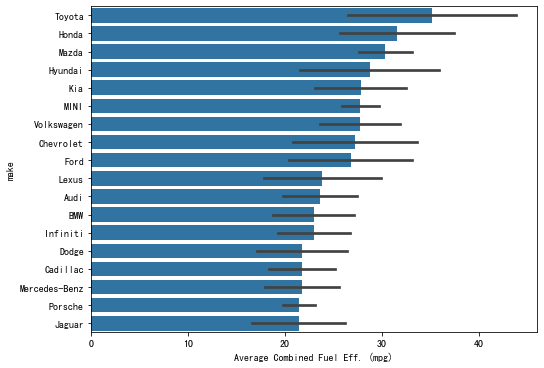

In [73]:
plt.figure(figsize=(8,6))
freq_makes = fuel_econ.make.value_counts()

# 统计各类别中样本数量在80以上的类别（’make‘字段）
threshhold = 80
total = np.sum(freq_makes > threshhold)

# 取出满足上述要求的所有类别（前18个类别）
most_makes = freq_makes.index[:total]
# most_makes

fuel_econ_sub = fuel_econ[fuel_econ['make'].isin(most_makes)]
make_means = fuel_econ_sub.groupby('make').mean()
# make_means

# 按照’comb‘降序排序，取出对应的index
comb_order = make_means.sort_values('comb', ascending=False).index

base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ_sub, x='comb', y='make', color=base_color, order=comb_order, ci='sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

## Clustered Bar Charts

**Study the relationship between two categorical variables, an alternative way to heat map.**

To depict the relationship between **two categorical variables**, we can extend the univariate bar chart into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an **order** that makes the plot **easy to interpret**. 

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This can be easily achieved by using `seaborn`'s `sns.countplot()` function under the `hue` argument:

### Example 1: Make comparisions betweencar car type and transmission types.

In [4]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Preparatory Step 1: Convert the `VClass` column from a plain object type into an ordered categorical type.**

In [10]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclass = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ.VClass = fuel_econ.VClass.astype(vclass)

In [13]:
fuel_econ.VClass

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

**Preparatory Step 2: Add a new column for transmission type - Automatic or Manual.**

In [14]:
fuel_econ.trans

0                        Automatic (AM6)
1                      Automatic (AM-S6)
2                         Automatic (S6)
3                         Automatic (S6)
4                         Automatic (S6)
                      ...               
3924    Automatic (variable gear ratios)
3925                     Automatic (AM6)
3926                     Automatic (AM6)
3927                     Automatic (S10)
3928                     Automatic (S10)
Name: trans, Length: 3929, dtype: object

In [21]:
fuel_econ.trans.str.split(' ')

0                          [Automatic, (AM6)]
1                        [Automatic, (AM-S6)]
2                           [Automatic, (S6)]
3                           [Automatic, (S6)]
4                           [Automatic, (S6)]
                        ...                  
3924    [Automatic, (variable, gear, ratios)]
3925                       [Automatic, (AM6)]
3926                       [Automatic, (AM6)]
3927                       [Automatic, (S10)]
3928                       [Automatic, (S10)]
Name: trans, Length: 3929, dtype: object

In [27]:
fuel_econ['trans_type'] = fuel_econ.trans.str.split(' ').apply(lambda x: x[0])

In [30]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


**Step 3. Plot the clustered bar chart**

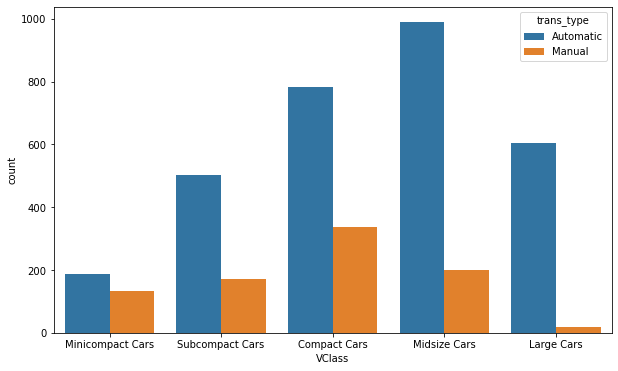

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

#### Use `sns.heatmap()` as a comparison for the same example.

**Preparatory Step 1: Self-define a categorical data type.**

In [ ]:
# # create a new column that only contains 'automatic' & 'manual' type
# fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x:x.split()[0])

# # Convert the "VClass" column from a plain object type into an ordered categorical type

# # Types of sedan cars
# sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# # Returns the types for sedan_classes with the categories and orderedness
# # Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
# vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# # Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
# fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

**Preparatory Step 2: Make summary on the dataset before drawing heat map。**

In [54]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [55]:
ct_counts = tmp1.reset_index()
ct_counts = tmp1.rename(columns={0: 'count'})
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [56]:
ct_counts = ct_counts.pivot_table(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


**Step 3: Plot the heat map.**

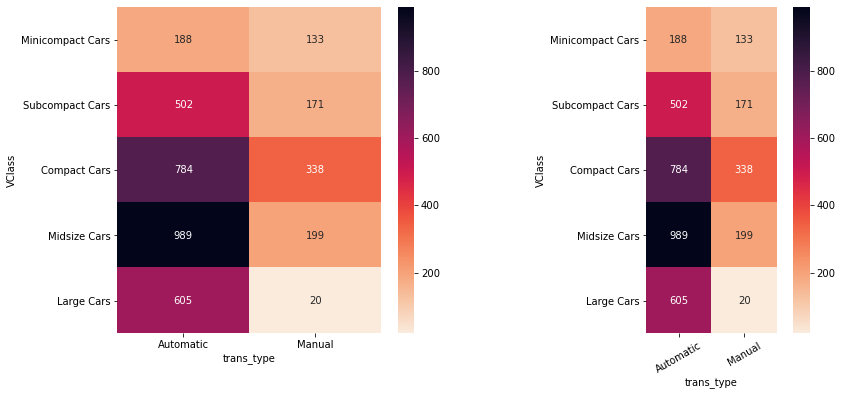

In [90]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
sns.heatmap(ct_counts, annot=True, fmt='d', cmap='rocket_r')
# cmap = = sns.cm.rocket_r

plt.subplot(122)
sns.heatmap(ct_counts, annot=True, fmt='d', square=True, cmap='rocket_r')
plt.xticks(rotation=30);

**Complementary Material**

`sns.color_palette` <a href='https://seaborn.pydata.org/tutorial/color_palettes.html'>docs</a>

In [84]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [86]:
sns.color_palette("rocket_r")

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

In [94]:
cmp = sns.color_palette("mako_r", as_cmap=True)

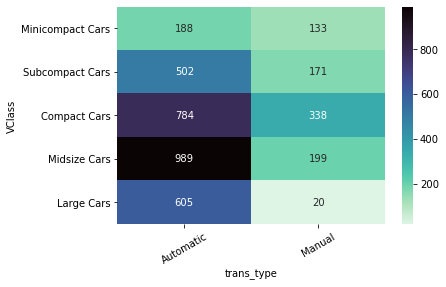

In [95]:
sns.heatmap(ct_counts, annot=True, fmt='d', cmap=cmp)
plt.xticks(rotation=30);